<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

* Tree Based Ensemble Classifiers
* Sequential Feature Selection
* Feature Importance from Tree Based Algorithm
* Permutation Feature Importance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
stomp = DecisionTreeClassifier(max_depth=1)

In [5]:
ada_clf = AdaBoostClassifier(stomp)

In [6]:
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [8]:
ada_clf.feature_importances_
#Petal length and petal width are important features for determining species

array([0.02, 0.06, 0.4 , 0.52])

<h2><a href="https://www.kaggle.com/spscientist/students-performance-in-exams">Student Performance Dataset</a></h2>

In [9]:
data = pd.read_csv("datasets\StudentsPerformance.csv")

In [10]:
columns = data.columns

In [11]:
data.profile_report(progress_bar=False)

In [12]:
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
y = data["math score"]
X = data.drop(['math score', 'reading score','writing score'], axis=1)

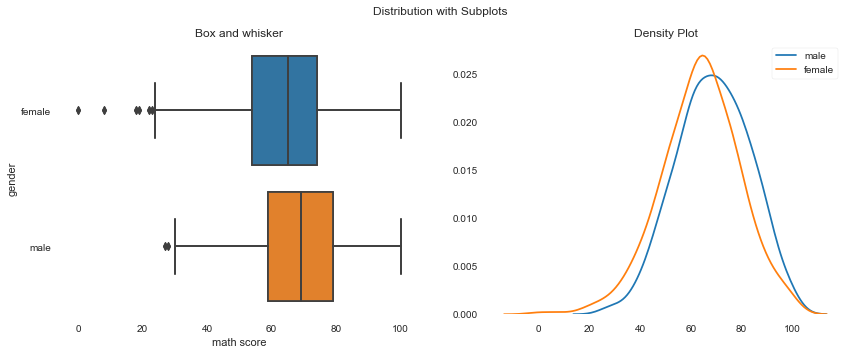

In [14]:
## fig, axs = plt.subplots(1,1,2)
plt.figure(figsize=(14, 5))
plt.suptitle("Distribution with Subplots")

plt.subplot(1,2,1)
plt.title("Box and whisker")
sns.boxplot(data["math score"], data["gender"])
sns.boxplot(data["math score"], data["gender"])

plt.subplot(1,2,2)
plt.title("Density Plot")
sns.kdeplot(data[data["gender"] == "male"]["math score"], label="male")
sns.kdeplot(data[data["gender"] == "female"]["math score"], label="female")
plt.show()

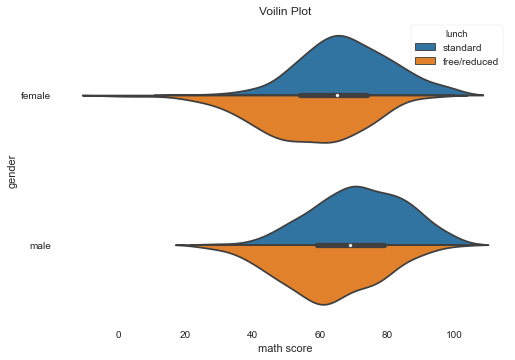

In [15]:
plt.title("Voilin Plot")
sns.violinplot(data["math score"], data["gender"], hue=data["lunch"], split=True)
plt.show()

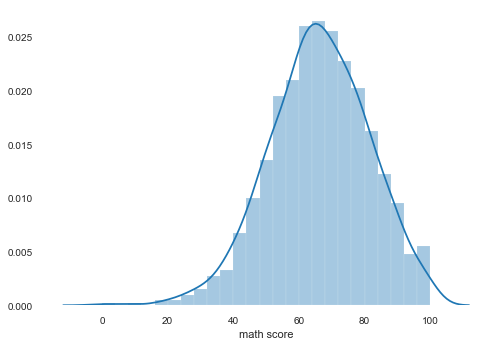

In [16]:
sns.distplot(data["math score"])
plt.show()

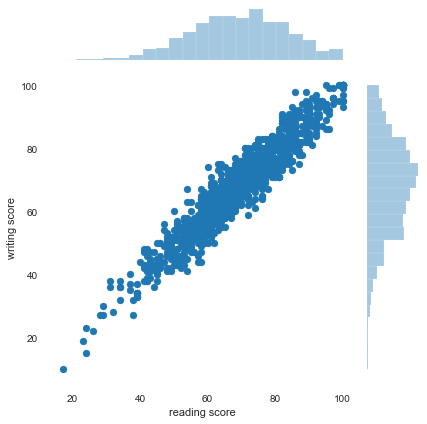

In [17]:
sns.jointplot(data["reading score"], data["writing score"], kind="scatter")
plt.show()

In [ ]:
## fig, axs = plt.subplots(1,1,2)

sns.boxplot(data["math score"], data["race/ethnicity"])
sns.boxplot(data["math score"], data["race/ethnicity"])

plt.show()

In [ ]:
sns.boxplot(data["math score"], data["parental level of education"])
sns.boxplot(data["math score"], data["parental level of education"])

plt.show()

In [ ]:
sns.boxplot(data["math score"], data["lunch"])
sns.boxplot(data["math score"], data["lunch"])

plt.show()

In [ ]:
sns.barplot(data["lunch"], data["math score"])
plt.show()

In [ ]:
data.lunch.value_counts()

In [ ]:
sns.kdeplot(data[data["lunch"] == "standard"]["math score"], label="standard")
sns.kdeplot(data[data["lunch"] == "free/reduced"]["math score"], label="free")
plt.show()

In [ ]:
sns.boxplot(data["math score"], data["test preparation course"])
sns.boxplot(data["math score"], data["test preparation course"])

plt.show()

In [ ]:
sns.lmplot("math score","reading score", data=data, hue="lunch")
plt.show()

In [ ]:
data["score new"] = pd.cut(data["math score"],[0,35,50,70,85,100], labels=["F", "D", "C", "B", "A"])

In [ ]:
sns.countplot("score new", data=data, hue="lunch")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
for col in X.columns:
    X[col] = enc.fit_transform(X[col])

In [ ]:
stomp = DecisionTreeRegressor(max_depth=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
algorithms = {
                "Decision Tree":     DecisionTreeRegressor(max_depth=5),
                "Random Forest":     RandomForestRegressor(n_estimators=100),
                "AdaBoosting":       AdaBoostRegressor(stomp, n_estimators=100),
                "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
                "XGB":               XGBRegressor(n_estimators=100)
              }

mae = []
f_imp = []

In [ ]:
for name,model in algorithms.items():
    print("*" * 10)
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = mean_absolute_error(y_test, y_pred)
    print("Mean Abolute Error: ", round(err, 3))
    mae.append(err)
    f_imp.append(model.feature_importances_)

In [ ]:
plt.bar(algorithms.keys(), mae)
plt.ylabel("MAE")
plt.show()

In [ ]:
features = list(X.columns)

In [ ]:
#Available styles 
plt.style.available

In [ ]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(20, 12))
plt.suptitle("Feature Importance given by different Methods")
for index,name in enumerate(algorithms.keys()):
    plt.subplot(3,2, index+1)
    sns.barplot(features, f_imp[index], label=name)
    plt.title(name)
    
plt.show()

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance 

In [ ]:
ada = AdaBoostRegressor(stomp, n_estimators=100)
ada.fit(X_train, y_train)

improtance = PermutationImportance(ada)

In [ ]:
improtance.fit(X_train, y_train)

eli5.explain_weights(improtance)

In [ ]:
features

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection

In [ ]:
sfs = SFS(ada, k_features=1, forward=False)

In [ ]:
sfs.fit(X_train, y_train)

sfs.get_metric_dict()

In [ ]:
plot_sequential_feature_selection(sfs.get_metric_dict())
plt.show()

In [ ]:
data = pd.read_csv("datasets/bike_share.csv")

In [ ]:
data.dtypes

In [ ]:
data["datetime"] = pd.DatetimeIndex(data["datetime"])

In [ ]:
data["weekday"] = [x.weekday() for x in data["datetime"]]

In [ ]:
data["hour"] = [x.hour for x in data["datetime"]]

In [ ]:
data["season"] = pd.Categorical(data["season"])

In [ ]:
data["weather"] = pd.Categorical(data["weather"])

In [ ]:
data.dtypes